In [7]:
import pickle
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def test_model(model, X, y):
    
    model.predict(X)
    
    return

In [5]:
def get_data(name:str='', SHUFFLE_FLAG:bool=False, NORM_FLAG:bool=True, random_state:int=42):
    '''
    Function to select data

    Arguments
    ---------
    name: str, (required)
        name of dataset to be returned
    SHUFFLE_FLAG: bool, (optional)
        Flag for if the data should be shuffled
    NORM_FLAG: bool, (optional)
        If the data should be normalized
    random_state: int, (optional)
        random_state
    
    Returns
    -------
    X: numpy.ndarray 
        training set 
    y: numpy.ndarray 
        test set
    '''
    
    if name is None or name not in ['gaia']:
        raise ValueError("Required argument 'name' is missing.")
    
    if name == "gaia":
        dir = '../../../data/Gaia DR3/test.parquet'
        data = pd.read_parquet(dir)
        if SHUFFLE_FLAG:
            df = shuffle(data)
        else:
            df = data
        X = np.vstack(df['flux'])
        y = np.vstack(df['Cat'])
        
        y = np.where(y == 'M', 1, y)
        y = np.where(y == 'LM', 0, y)

        y = y.astype(int)

        if NORM_FLAG:
            norm = np.linalg.norm(X,keepdims=True)
            X = X/norm
            
    return X, y

Total number of spectra: 3526
Number of bins in each spectra: 343
In the dataset, we have 2206 spectra for low mass stars and 1320 spectra for high mass stars.


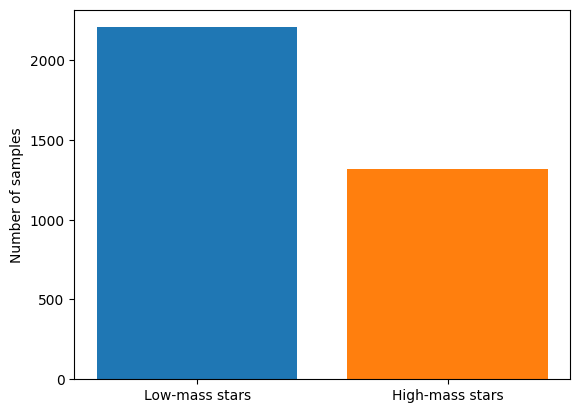

In [8]:
X, y = get_data('gaia', SHUFFLE_FLAG=True)

num_samples = X.shape[0]
spectrum_width = X.shape[1]

num_samples_m = np.count_nonzero(y)
num_samples_lm = len(y) - num_samples_m
num_classes = len(np.unique(y))

print("Total number of spectra:", num_samples)
print("Number of bins in each spectra:", spectrum_width)
print("In the dataset, we have", num_samples_lm, "spectra for low mass stars and", num_samples_m, "spectra for high mass stars.")

plt.bar(["Low-mass stars", "High-mass stars"],[num_samples_lm, num_samples_m], color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Number of samples")
plt.show()